In [2]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from siphon.catalog import TDSCatalog
from siphon.radarserver import RadarServer
from siphon.cdmr import Dataset
from metpy.plots import ctables, add_timestamp, add_metpy_logo
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import numpy as np
import rasterio as rio

%matplotlib inline

In [3]:
cat = TDSCatalog('https://thredds.ucar.edu/thredds/radarServer/catalog.xml')

In [4]:
rs = RadarServer(cat.catalog_refs['NEXRAD Level III Radar from IDD'].href)

In [5]:
query = rs.query()
now = datetime.utcnow()
query.stations('SGF').time(now).variables('N0Q')

var=N0Q&time=2019-03-31T16%3A07%3A10.075772&stn=SGF

In [6]:
query_cat = rs.get_catalog(query)
print(query_cat)
data = query_cat.datasets[0].remote_access()

Radar NEXRAD Level III Radar from IDD datasets in near real time


In [7]:
def plot_radar(data, field_name):
    rng = data.variables['gate'][:]
    az = data.variables['azimuth'][:]
    ref = data.variables[field_name][:]
    
    distance_in_degrees = 3
    ax.set_extent([data.RadarLongitude - distance_in_degrees,
                   data.RadarLongitude + distance_in_degrees,
                   data.RadarLatitude - distance_in_degrees,
                   data.RadarLatitude + distance_in_degrees])
    
    x = rng * np.sin(np.deg2rad(az))[:, None]
    y = rng * np.cos(np.deg2rad(az))[:, None]
    
    norm, cmap = ctables.registry.get_with_range('NWSReflectivity', -30, 100)
    
    mesh = ax.pcolormesh(x, y, ref, cmap=cmap, norm=norm, zorder=0)
    
    return mesh
    

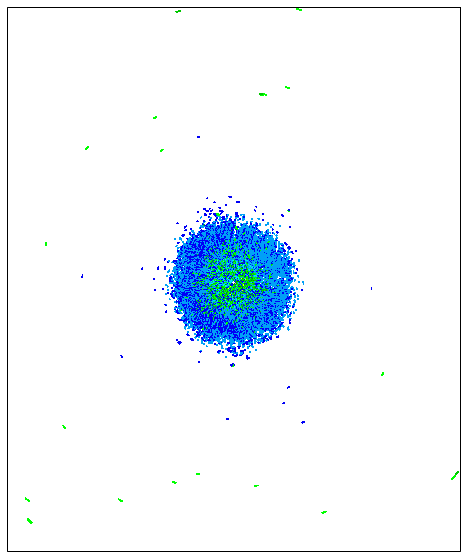

In [8]:
field_name = 'BaseReflectivityDR'

proj = ccrs.LambertConformal(central_longitude=data.RadarLongitude,
                                    central_latitude=data.RadarLatitude)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1, projection=proj)

# Get pixels into a numpy array
fig.canvas.draw()
raster = np.array(fig.canvas.renderer._renderer)

plot_radar(data, field_name)

plt.savefig('radar.png')
